In [1]:
%matplotlib inline

In [2]:
from numpy import *
from matplotlib.pyplot import *
from scipy.linalg import inv

In [3]:
# Load the data

data = loadtxt('data/data_train.csv', delimiter=',')

In [4]:
## (:, 0) = the week number
## (:, 1) = the average measured temperature
## (:, 2) = soil moisture
## (:, 3) = the number of new cells (known as tracheids)

In [5]:
# Prepare the data

X = data[:,0:-1]
y = data[:,-1]

In [6]:
X.shape, y.shape

((159, 3), (159,))

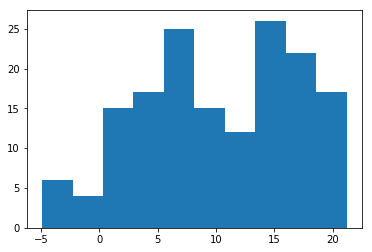

In [7]:
# Inspect the data

figure()
hist(X[:,1], bins=10);

## SB, Temp. histogram

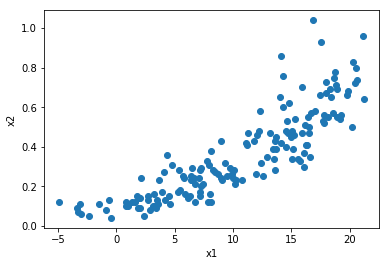

In [8]:
# <TASK 1>
## SB. Temp. versus Moisture
figure()
plot(X[:,1],X[:,2], 'o')
xlabel('x1')
ylabel('x2');

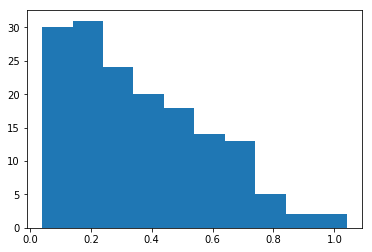

In [9]:
## SB, Moisture histogram
figure()
hist(X[:, 2]);

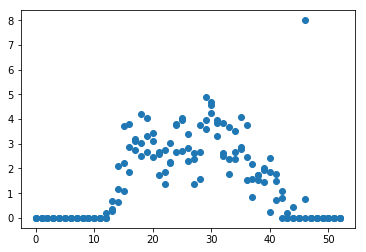

In [10]:
## SB, week number versus target
figure()
plot(X[:, 0], y, 'o');

In [11]:
# Standardization
m=mean(X,axis=0) ### Junha
s=std(X,axis=0) 
X = (X - m) / s 

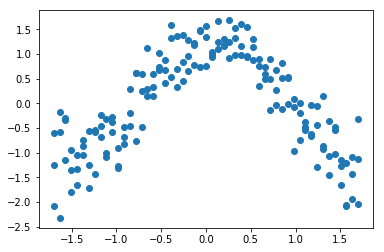

In [12]:
# <TASK 2> 
## SB, show ? show if it is normalized
## week vs Temp.
figure()
plot(X[:, 0], X[:, 1], 'o');

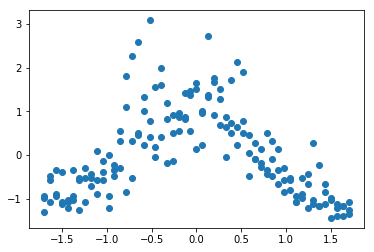

In [13]:
## SB, show if it is normalized
figure()
plot(X[:, 0], X[:, 2], 'o');

In [14]:
# <TASK 2>

# Feature creation

from tools import poly_exp
Z = poly_exp(X,2) ## stacking as described in pdf.

Z = column_stack([ones(len(Z)), Z]) ## numpy.column_stack(), add ones column at [:, 0]

# Building a model



In [15]:
Z.shape # (159, 3) -> (159, 6) -> (159, 7)

(159, 7)

In [16]:
# <TASK 3>
## implement ordinary least squares in Python using the 'dot' function in NumPy
Z.transpose().shape

w = dot(  dot( inv(dot(Z.transpose(), Z)), Z.transpose() ), y  )
## SB,  (7 by 159 * 159 by 7) * 7 by 159 = (7 by 159) * (159 by 1) = w(7 by 1) 
w.shape
# Evaluation 
print('w = ', w)
#y_pred = dot(Z_test,w)



w =  [ 1.90241744  0.11717127  0.69105316  0.03082837 -0.67639436  0.23993777
  0.03064292]


In [17]:
# <TASK 4> Load and preprocess the test data
#######################################################
## Load the data
# Prepare the data
data_test = loadtxt('data/data_test.csv', delimiter=',')
X_test = data_test[:,0:-1]
y_test = data_test[:,-1]

## Preprocess the test data
# Standardization

X_test = (X_test - m) / s ### Junha

# <TASK 2>

# Feature creation

Z_test = poly_exp(X_test,2) ## stacking as described in pdf.

Z_test = column_stack([ones(len(Z_test)), Z_test]) ## numpy.column_stack(), add ones column at [:, 0]
print('Z_test.shape', Z_test.shape)
#######################################################
from tools import MSE



Z_test.shape (53, 7)


In [18]:
# <TASK 5> implement the MSE calculation
y_pred = dot(Z_test, w) # w is from the training data
## SB,     (53 by 7) * (7 by 1) = 53 by 1
print('y_pred.shape', y_pred.shape,
      'y_test.shape', y_test.shape)
mse = MSE(y_test, y_pred)
print('MSE on test data', mse)

y_pred.shape (53,) y_test.shape (53,)
MSE on test data 0.546191331548


In [19]:
# <TASK 6> additional calculation, if y_pred is the simple mean of Y in the training data.
mse_baseline = MSE(y_test, mean(y))
print('MSE baseline', mse_baseline)

MSE baseline 1.7691746529


# Notes:

## Task 7

The results found up until Task 6 are given in the Lab Description. Results after removing the outlier (Task 7) are:

w =  [ 1.838  0.069  0.669  0.185 -0.63   0.28  -0.043]
MSE on test data   0.509881463006
MSE baseline       1.72845474467

Replacing the outlier with 0 can be achieved by either using the line commented at the beginning of the file main.py, 
#y[y >= 8] = 0       # <-- Task 7 data cleaning
or by manual replacement in the data file (the outlier is at line 47).

Regarding the second part of Task 7: it is easy to achieve even better results by, e.g., changing from degree '2' to '3' in the call to poly_exp: 

MSE on test data   0.444276226552
MSE baseline       1.72845474467

## Task 8

Since Task 8 requires refactorization of some of the code, a possible solution is provided separately: in main_bonus.py



In [20]:
# <TASK 7>
## y[y >= 8] = 0



In [21]:
# <TASK 8: You will need to make changes from '# Feature creation'
#          To get the exact results, you will need to reverse the second part of Task 7 (your own modifications)>


In [24]:
## SB, initialize x axis and y axis
x_val = arange(1, 8) # sepcify the degree of polynomial, n = 1 to 7
y_val_training = array([])

In [25]:
# Feature creation
## SB, using 'Training data'
X = data[:,0:-1]
y = data[:,-1]
m=mean(X,axis=0) ### Junha
s=std(X,axis=0) 
X = (X - m) / s 

for n in x_val:
    Z = poly_exp(X,n) 
    Z = column_stack([ones(len(Z)), Z]) 
    w = dot(  dot( inv(dot(Z.transpose(), Z)), Z.transpose() ), y  )
    y_pred = dot(Z, w)
    print('Z.shape', Z.shape, 'w.shape', w.shape)
    mse = MSE(y, y_pred)
    print('mse', mse)
    y_val_training = append(y_val_training, mse)
y_val_training

Z.shape (159, 4) w.shape (4,)
mse 1.04704884394
Z.shape (159, 7) w.shape (7,)
mse 0.917789583619
Z.shape (159, 10) w.shape (10,)
mse 0.868812994017
Z.shape (159, 13) w.shape (13,)
mse 0.783310711199
Z.shape (159, 16) w.shape (16,)
mse 0.77782481192
Z.shape (159, 19) w.shape (19,)
mse 0.757387580064
Z.shape (159, 22) w.shape (22,)
mse 0.75056686485


array([ 1.04704884,  0.91778958,  0.86881299,  0.78331071,  0.77782481,
        0.75738758,  0.75056686])

In [23]:
y_val_test = array([])

In [26]:
## SB, using 'Test data'

X_test = data_test[:,0:-1]
y_test = data_test[:,-1]
X_test = (X_test - m) / s ## *** 

for n in x_val:
    Z = poly_exp(X,n)
    Z = column_stack([ones(len(Z)), Z]) 
    w = dot(  dot( inv(dot(Z.transpose(), Z)), Z.transpose() ), y  )
    #############################################################################
    Z_test = poly_exp(X_test,n) ## stacking as described in pdf.
    Z_test = column_stack([ones(len(Z_test)), Z_test]) ## numpy.column_stack(), add ones column at [:, 0]
    y_pred = dot(Z_test, w)
    #############################################################################
    mse = MSE(y_test, y_pred)
    y_val_test = append(y_val_test, mse)
y_val_test

array([ 0.73734603,  0.54619133,  0.50266401,  0.47922224,  0.43806816,
        0.79013932,  1.7503131 ])

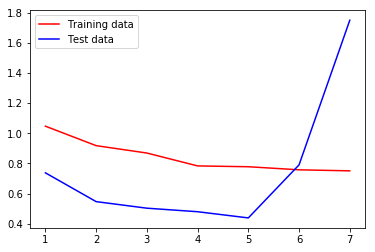

In [27]:
figure()
plot(x_val, y_val_training, 'r', label='Training data');
plot(x_val, y_val_test, 'b', label='Test data');
legend();